In [28]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('..')
import MRH
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading file
test data are available at: http://doi.org/10.5281/zenodo.4521878

In [ ]:
mzml_file = 'NEWSTD_1000.mzML'
spectra = MRH.mzml_data_processing(mzml_file)

spectra.head()

### Spectra filtering

index    ms_level            rt            mz     intensity
count  1.137899e+07  11378991.0  1.137899e+07  1.137899e+07  1.137899e+07
mean   2.814800e+03         1.0  8.055361e+02  2.362794e+02  6.239456e+04
std    1.492228e+03         0.0  4.240841e+02  1.189385e+02  4.560666e+05
min    1.880000e+02         1.0  6.094980e+01  9.600335e+01  5.561148e+03
25%    1.532000e+03         1.0  4.381333e+02  1.491334e+02  8.264167e+03
50%    2.905000e+03         1.0  8.334262e+02  1.989739e+02  1.407066e+04
75%    4.017000e+03         1.0  1.147223e+03  2.850285e+02  3.208386e+04
max    5.477000e+03         1.0  1.560456e+03  8.494468e+02  1.146202e+08

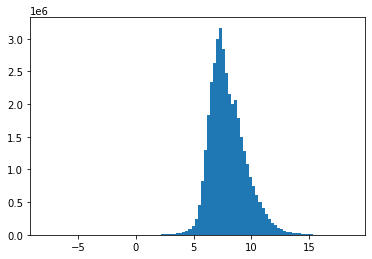

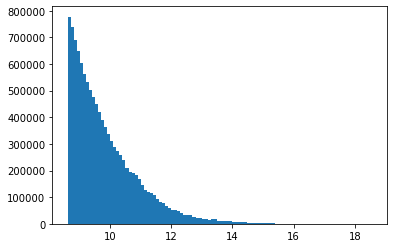

In [35]:
# zero intensity removal
spectra = MRH.zero_intensity_removal(spectra)

plt.figure()
plt.hist(np.log(spectra['intensity']), bins=100)

# noise filtering
spectra = MRH.noise_filtering_simple(spectra, model='constant_quantile', q=0.7)

plt.figure()
plt.hist(np.log(spectra['intensity']), bins=100)

spectra.describe()

### Decomposition

In [18]:
# set parameters
mz_resolutions = [-1, 0, 1, 2, 3]
rt_resolutions = [0, 0, 0, 0, 0]
min_gaps = [2, 5, 10, 20, 20]

In [ ]:
tree = MRH.create_tree(spectra, mz_resolutions, rt_resolutions, min_gaps)

### Peak picking

In [ ]:
peaks = MRH.peak_picker(tree)
peaks.head()

In [14]:
peaks.describe()

mz           rt     intensity        index  ms_level  \
count  126.000000   126.000000  1.260000e+02   126.000000     126.0   
mean   422.082873   616.774541  2.400789e+05  2147.706349       1.0   
std    144.508660   215.001290  9.961667e+05   752.516345       0.0   
min     98.965784    61.219152  6.379562e+03   189.000000       1.0   
25%    328.334254   518.489358  2.276797e+04  1810.000000       1.0   
50%    409.425781   622.111350  4.784854e+04  2160.500000       1.0   
75%    501.112169   737.791695  1.028134e+05  2565.750000       1.0   
max    848.417109  1228.707600  1.009950e+07  4305.000000       1.0   

              score  
count  1.260000e+02  
mean   8.117089e-02  
std    2.320182e-01  
min    1.016602e-07  
25%    9.195213e-07  
50%    1.933284e-06  
75%    6.001223e-06  
max    1.000000e+00